      Name   Age  Gender      City   Salary  Salary_Transformed  \
0     john  25.0    male  New York  50000.0             51000.0   
1     jane  32.0  female    London  60000.0             61000.0   
2    alice   NaN  female     Paris  70000.0             71000.0   
3      bob  45.0    male     Tokyo  55000.0             56000.0   
4  charlie  28.0    male    Sydney  45000.0             46000.0   
5    David  39.0    male  New York      NaN                 NaN   
6      Eva  42.0  female    London  65000.0             66000.0   
7    Frank   NaN    male     Paris  80000.0             81000.0   
8   Grance  30.0  female     Tokyo  55000.0             56000.0   
9    Henry  35.0    male    Sydney  60000.0             61000.0   

    Gender_Mapped City_Lowercase   City_Length  
0               0       new york             8  
1               1         london             6  
2               1          paris             5  
3               0          tokyo             5  
4               0

<ipython-input-1-dd50c74f4d1b>:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean())  # Fill missing values with mean


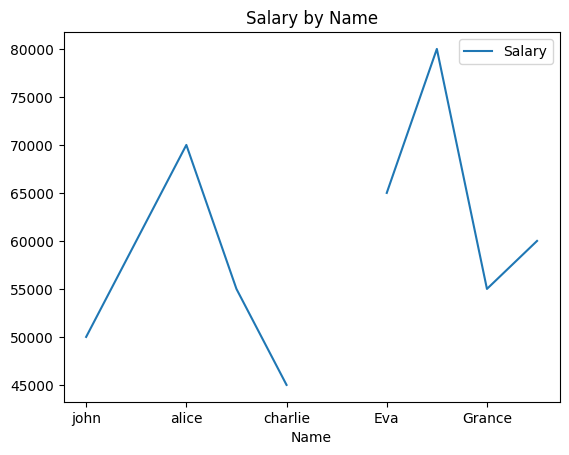

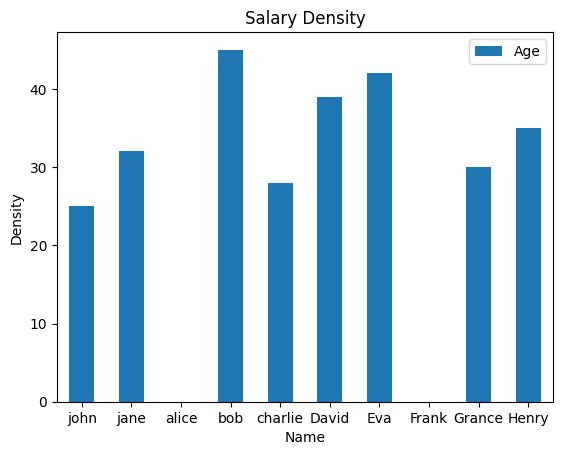

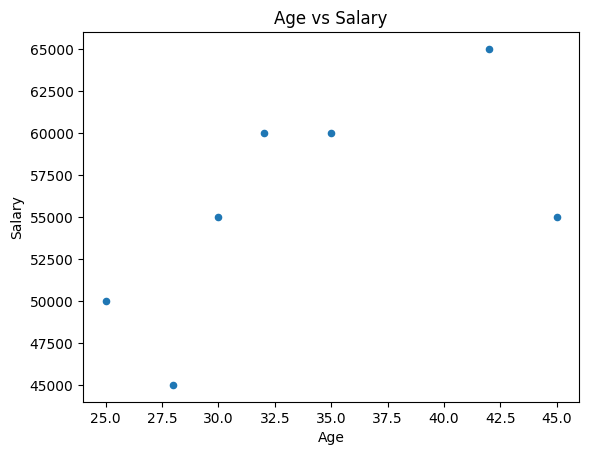

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df=pd.read_csv("9thdata.csv")
# Create DataFrame from the sample data
print(df)
# Create DataFrame from the sample data

# (a) Handle missing data by detecting and dropping/filling missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

df_dropped = df.dropna()  # Drop rows with missing values
df_filled = df.fillna(df.mean())  # Fill missing values with mean

# (b) Transform data using apply() and map() method
df['Salary_Transformed'] = df['Salary'].apply(lambda x: x + 1000)  # Example of using apply() method
gender_mapping = {'Male': 0, 'Female': 1}
df['Gender_Mapped'] = df['Gender'].map(gender_mapping)  # Example of using map() method

# (c) Detect and filter outliers
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
filtered_df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# (d) Perform Vectorized String operations on Pandas Series
df['City_Lowercase'] = df['City'].str.lower()
df['City_Length'] = df['City'].str.len()

# (e) Visualize data using Line Plots, Bar Plots, Histograms, Density Plots, and Scatter Plots
df.plot(kind='line', x='Name', y='Salary', title='Salary by Name')
df.plot(kind='bar', x='Name', y='Age', title='Age by Name')
df['Age'].plot(kind='hist', title='Age Distribution')
df['Salary'].plot(kind='density', title='Salary Density')
df.plot(kind='scatter', x='Age', y='Salary', title='Age vs Salary')

plt.show()